### 1. Import thư viện

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load dữ liệu lên data frame

In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 3.Phân tích EDA các cột input

In [6]:
# 3.1 Cách đánh index của dataframe
df.index

RangeIndex(start=0, stop=303, step=1)

In [7]:
# 3.2 Danh sách các cột input
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

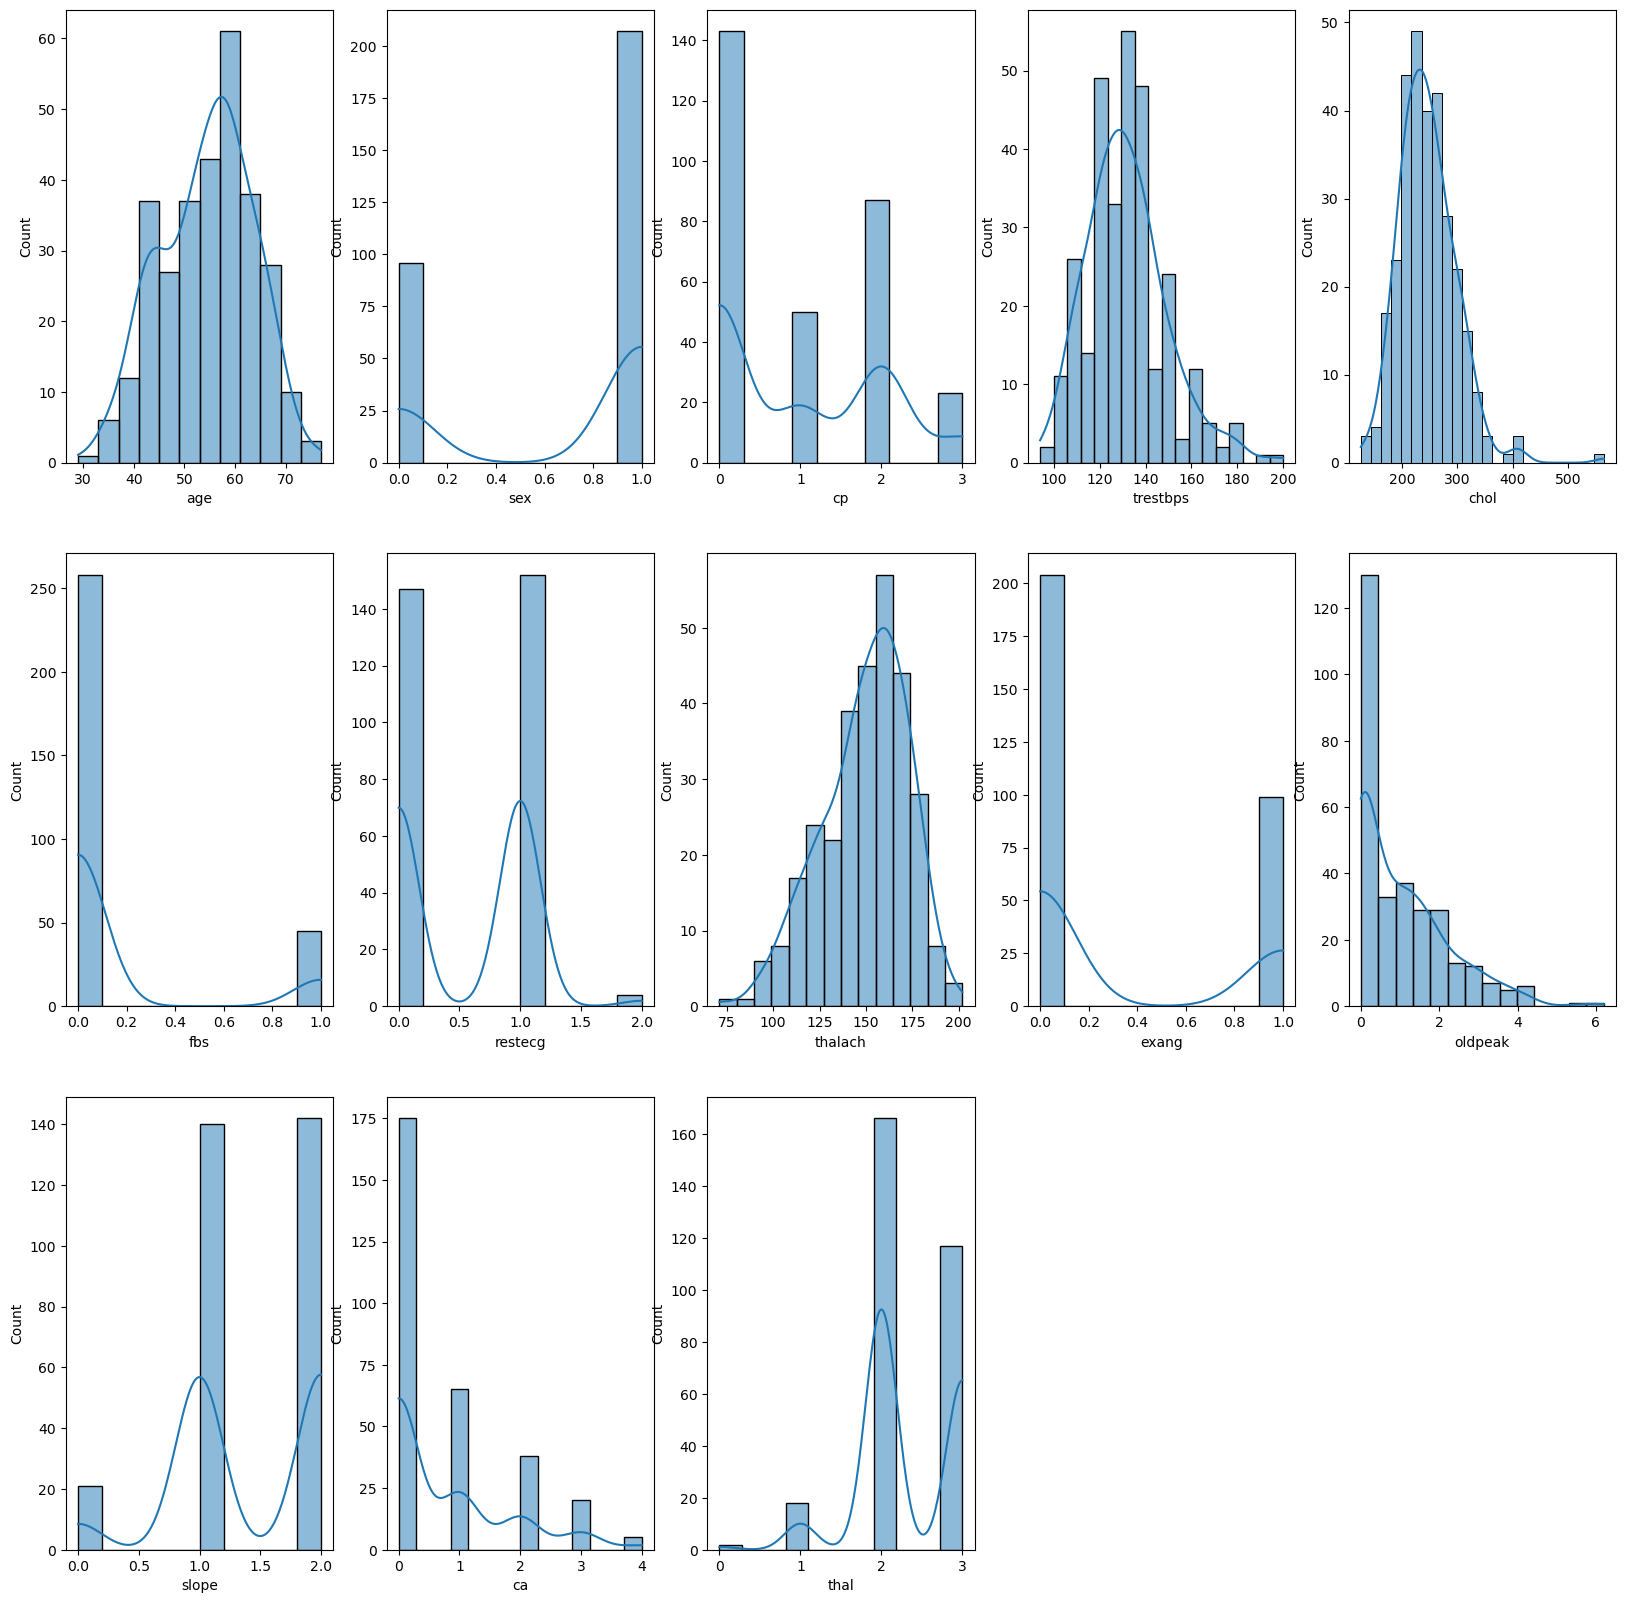

In [8]:
# 3.3 Phân tích phân phối các biến số input
fig = plt.figure(figsize=(20, 20))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sns.histplot(data=df, x=colname, kde=True)

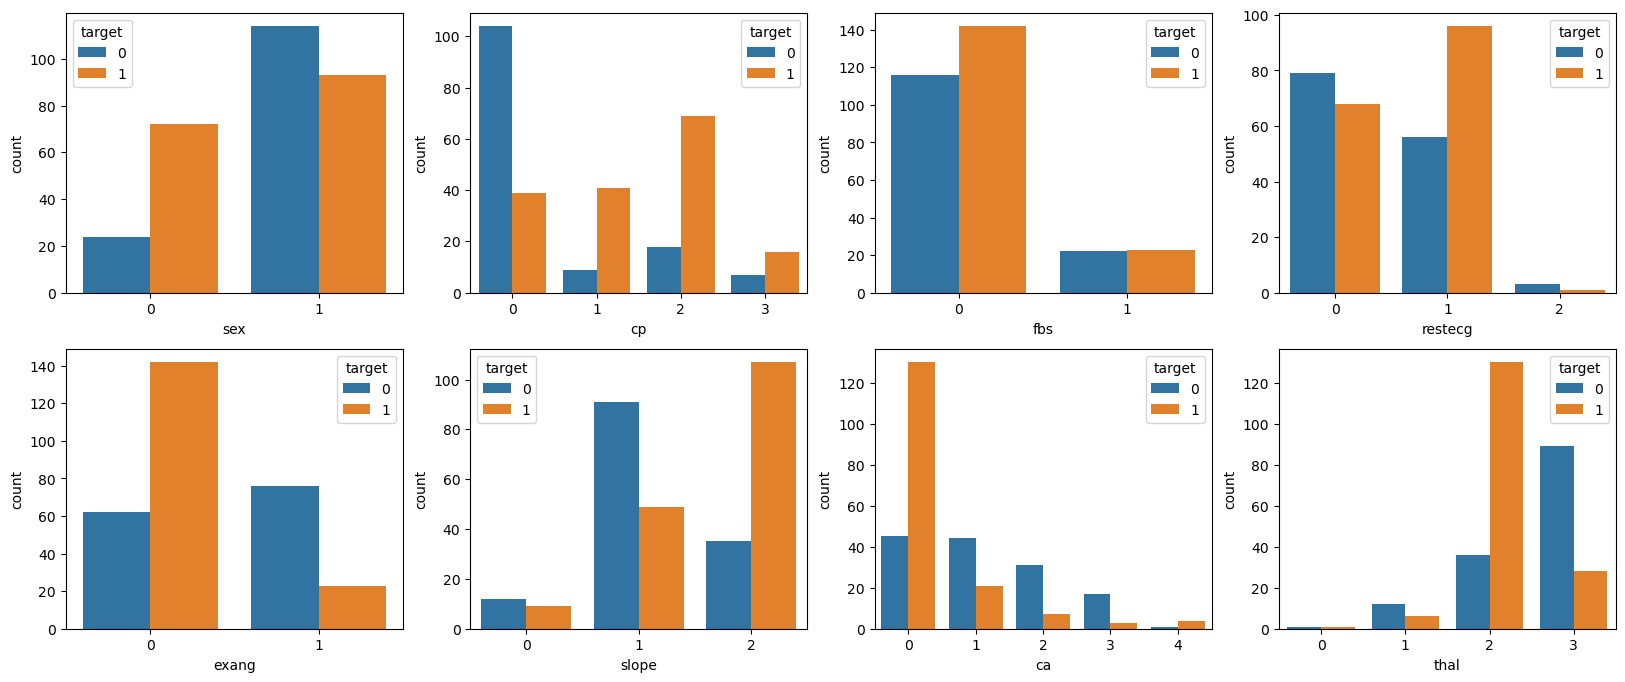

In [9]:
# 3.4 Đếm số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20, 8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=df, x=colname, hue='target')

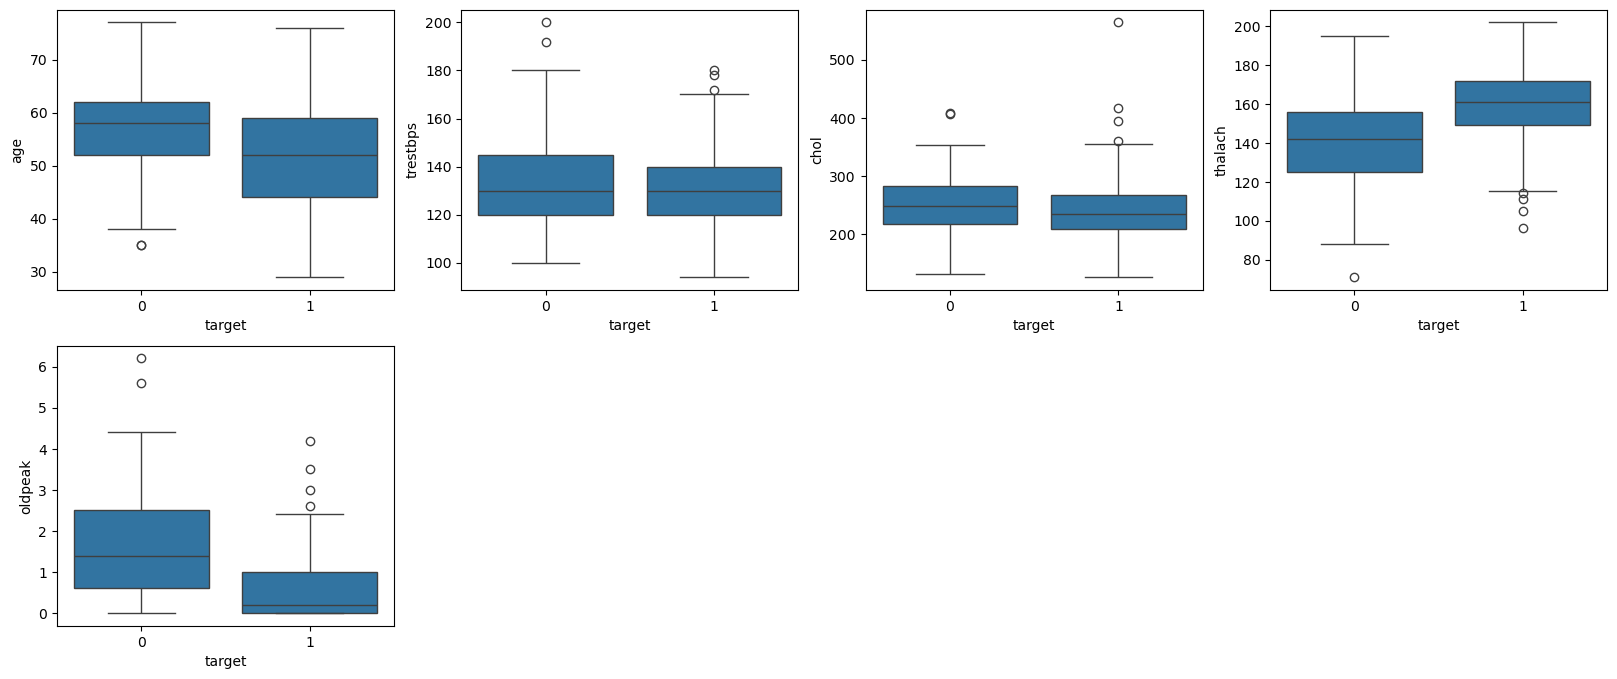

In [10]:
# 3.5 Phân tích biểu đồ Boxplot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20, 8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.boxplot(data=df, x="target", y=colname)

### 4. Xây dựng mô hình

In [11]:
# 4.1 Chuẩn bị dữ liệu
x = df.iloc[:, :-1].values
y = df[['target']].values
x = x.astype(float)
y = y.astype(float)

In [12]:
# 4.2 Chia dữ liệu thành tập train và tập test tỉ lệ 80-20 hệ số random = 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(x, y, df.index, test_size=0.2, random_state=42)

In [13]:
# 4.3 Hiển thị danh sách 5 dòng cuối cùng của tập x_test và y_test
print(x_test[0:5])
print(y_test[0:5])

[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [14]:
# 4.4 Hiển thị danh sách index của các sample trong tập x_train và x_test
print(indices_train)
print(indices_test)

Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)
Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [15]:
# 4.5 Huấn luyện mô hình
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm="brute", metric="minkowski")

knnModel.fit(x_train, y_train)

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [16]:
# 4.6 Đanh giá mô hình trên tập dữ liệu train và test bằng độ đo accuracy
print(knnModel.score(x_train, y_train))
print(knnModel.score(x_test, y_test))

0.7603305785123967
0.6885245901639344


### 5. Hyperparameter turning model with Grid Search

Number of candidates: 20
1/20: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} - 0.8099173553719008 - 0.639344262295082
2/20: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} - 0.7727272727272727 - 0.6557377049180327
3/20: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4} - 0.743801652892562 - 0.6721311475409836
4/20: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5} - 0.7603305785123967 - 0.6885245901639344
5/20: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6} - 0.7520661157024794 - 0.7213114754098361
6/20: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2} - 0.8099173553719008 - 0.639344262295082
7/20: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3} - 0.7727272727272727 - 0.6557377049180327
8/20: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4} - 0.743801652892562 - 0.6721311475409836
9/20: {'algorithm': 'ball_tree', 'metric': 'minkows

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

18/20: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 4} - 0.743801652892562 - 0.6721311475409836
19/20: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 5} - 0.7603305785123967 - 0.6885245901639344
20/20: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 6} - 0.7520661157024794 - 0.7213114754098361
[[{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3}, 0.7727272727272727, 0.6557377049180327], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4}, 0.743801652892562, 0.6721311475409836], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5}, 0.7603305785123967, 0.6885245901639344], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6}, 0.7520661157024794, 0.7213114754098361], [{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2}, 0.8099173553719008, 0.6393442622

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


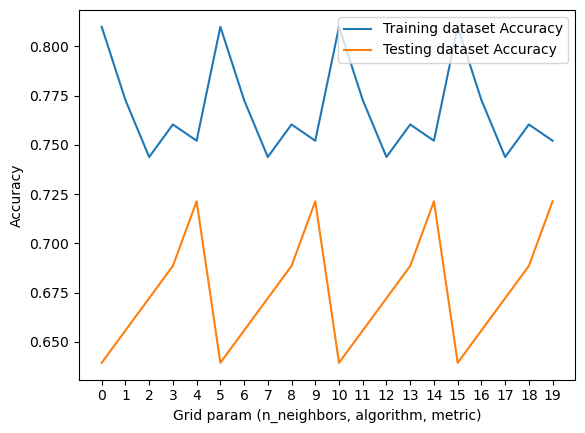

In [17]:
# 5.1 Sử dụng Grid Search với nhiều hyperparameters khác nhau

from sklearn.model_selection import ParameterGrid

estimator = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(2, 7),
    'algorithm': ['ball_tree', 'kd_tree'],
    'metric': ['euclidean', 'minkowski']
}

param_candidates = ParameterGrid(param_grid)

print(f"Number of candidates: {len(param_candidates)}")

results = []
for i, params in enumerate(param_candidates):
    model = estimator.set_params(**params)
    model.fit(x_train, y_train)
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    results.append([params, score_train, score_test])
    print(f"{i + 1}/{len(param_candidates)}: {params} - {score_train} - {score_test}")

# Hiển thị kết quả
print(results)
print(f"Max score on train: {max(results, key=lambda x: x[1])}")
print(f"Max score on test: {max(results, key=lambda x: x[2])}")

list_index_on_results = range(len(results))

list_score_on_train = [x[1] for x in results]
list_score_on_test = [x[2] for x in results]
print(list_score_on_train)
print(list_score_on_test)

# Vẽ biểu đồ
plt.plot(list_index_on_results, list_score_on_train, label='Training dataset Accuracy')
plt.plot(list_index_on_results, list_score_on_test, label='Testing dataset Accuracy')
plt.legend()
plt.xlabel('Grid param (n_neighbors, algorithm, metric)')
plt.xticks(range(len(results)), range(len(results)))
plt.ylabel('Accuracy')
plt.show()

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

K = 1, Train accuracy = 1.0, Test accuracy = 0.6229508196721312
K = 2, Train accuracy = 0.8099173553719008, Test accuracy = 0.639344262295082
K = 3, Train accuracy = 0.7727272727272727, Test accuracy = 0.6557377049180327
K = 4, Train accuracy = 0.743801652892562, Test accuracy = 0.6721311475409836
K = 5, Train accuracy = 0.7603305785123967, Test accuracy = 0.6885245901639344
K = 6, Train accuracy = 0.7520661157024794, Test accuracy = 0.7213114754098361
K = 7, Train accuracy = 0.743801652892562, Test accuracy = 0.7049180327868853
K = 8, Train accuracy = 0.7231404958677686, Test accuracy = 0.6885245901639344
K = 9, Train accuracy = 0.71900826446281, Test accuracy = 0.6885245901639344
K = 10, Train accuracy = 0.6942148760330579, Test accuracy = 0.7049180327868853
K = 11, Train accuracy = 0.7272727272727273, Test accuracy = 0.7540983606557377
K = 12, Train accuracy = 0.6983471074380165, Test accuracy = 0.7377049180327869
K = 13, Train accuracy = 0.6900826446280992, Test accuracy = 0.737704

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


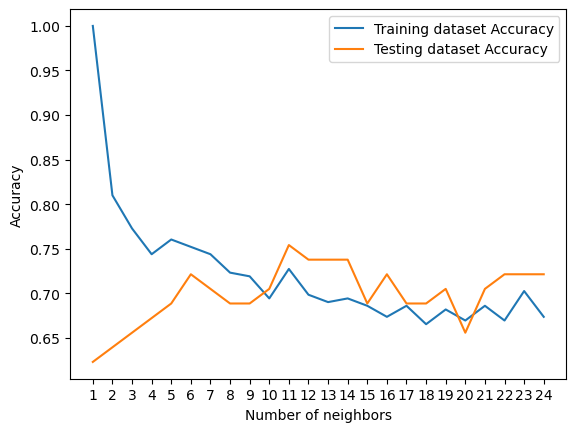

In [18]:
# 5.2 Sử dụng tham số k để thăm dò giá trị K tốt nhất
import numpy as np
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

    print(f"K = {k}, Train accuracy = {train_accuracy[i]}, Test accuracy = {test_accuracy[i]}")

# Vẽ biểu đồ
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.xticks(np.arange(1, 25), np.arange(1, 25))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### 6. Sử dụng tham số k tốt nhất để giải quyết các yêu cầu bên dưới

In [19]:
# 6. Xây dựng lại mô hình với k là tốt nhất

knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(x_train, y_train)

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [20]:
# 7. Cho biết độ chính xác của mô hình
print(knnModel.score(x_train, y_train))
print(knnModel.score(x_test, y_test))

0.7272727272727273
0.7540983606557377


In [21]:
# 8. In ra danh sách các index của mẫu dữ liệu trong tập test và khoảng cách từ các hàng xóm đến các mẫu dữ liệu đó theo mô hình
distances, indices = knn.kneighbors(x_test)
print(indices)
print(distances)

[[  1  79 161 ... 168  78 141]
 [179 101  89 ... 234   5 153]
 [195 148 147 ... 154  76  95]
 ...
 [ 51  98  35 ... 229 159  16]
 [167   7  70 ... 153 185   5]
 [ 67 168 137 ... 202 187   1]]
[[ 6.63626401 17.93906352 18.22882333 ... 41.69124608 41.69124608
  41.84602729]
 [20.96759404 21.51650529 26.15415837 ... 43.04695111 44.7888379
  45.71695528]
 [46.55276576 46.92589903 53.2169146  ... 71.7147823  74.28923206
  75.0269285 ]
 ...
 [ 9.50578771 18.73926359 20.66010649 ... 31.94620478 32.22669701
  33.00666599]
 [12.9938447  17.78341924 18.62793601 ... 31.19038313 31.27299154
  32.26205201]
 [13.66601624 14.57943757 21.25464655 ... 32.04122345 32.89133625
  32.97332255]]


In [22]:
# 9. Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần k (hàng xóm)
# dòng nào trong tập train tính theo index
# và khoảng cách tương ứng theo độ đo Euclidean là bao nhiêu?

print(indices[0])
print(distances[0])

[  1  79 161 222 211  25 217 166 103 111  88 192 137 138  86  69  70  67
 187  62 167 168  78 141]
[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052 41.30375286 41.33231182 41.69124608 41.69124608 41.84602729]


In [23]:
# 10. Cho biết với 1 sample input tương ứng
# ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# là [47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]
# với tương ứng lần lượt khoảng cách là bao nhiêu và cho biết giá trị age của hàng xóm gần nhất

sample_input = [[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]]
tdistances, tindices = knn.kneighbors(sample_input)

print(tdistances)
print(tindices)

[[16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
  23.09567059 23.23790008 23.89748941 24.4705946  24.58149711 25.35764185
  25.95168588 26.23432866 26.97202254 27.02313823 27.08892763 27.28167883
  27.43009296 27.9300913  28.27100989 28.93527259 28.96981187 29.02912331]]
[[168   2 180  11  94  62 172 213  67  66 189 187  33 124 233 204   3 103
  125  70 192  14 197  26]]


In [24]:
# 11. Xem danh sách các giá trị của lớp đánh nhãn của biến output (target)
# nhằm xa xác định bệnh nhân có bệnh hay không

classes = knnModel.classes_
classes

array([0., 1.])

In [25]:
# 12. Xem danh sách xác suất tiền dự báo của các tập mẫu dữ liệu trong tập test theo các nhãn đầu ra
y_test_score = knn.predict_proba(x_test)
y_test_score

array([[0.70833333, 0.29166667],
       [0.41666667, 0.58333333],
       [0.33333333, 0.66666667],
       [0.54166667, 0.45833333],
       [0.66666667, 0.33333333],
       [0.25      , 0.75      ],
       [0.41666667, 0.58333333],
       [0.54166667, 0.45833333],
       [0.75      , 0.25      ],
       [0.45833333, 0.54166667],
       [0.54166667, 0.45833333],
       [0.41666667, 0.58333333],
       [0.375     , 0.625     ],
       [0.58333333, 0.41666667],
       [0.16666667, 0.83333333],
       [0.20833333, 0.79166667],
       [0.16666667, 0.83333333],
       [0.58333333, 0.41666667],
       [0.66666667, 0.33333333],
       [0.58333333, 0.41666667],
       [0.375     , 0.625     ],
       [0.83333333, 0.16666667],
       [0.70833333, 0.29166667],
       [0.45833333, 0.54166667],
       [0.58333333, 0.41666667],
       [0.20833333, 0.79166667],
       [0.625     , 0.375     ],
       [0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [26]:
# 13. Cho biết mẫu input có index = 2 trong tập test 
# khi qua mô hình dự báo sẽ nhãn nào cao hơn và xác suất bao nhiêu
# còn thấp là nhãn nào có xác suất bao nhiêu

print(x_test[2])
print(y_test_score[2])

[ 57.    1.    2.  150.  126.    1.    1.  173.    0.    0.2   2.    1.
   3. ]
[0.33333333 0.66666667]


In [27]:
# 14. Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu trong tập test
# hãy cho biết kết qua dự báo của mẫu input thứ trong tập test
y_test_predicted = knn.predict(x_test)
y_test_predicted

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [28]:
# 15. Hãy cho biết nếu điều chỉnh ngưỡng xác suất đưa ra quyết định là 0.65 
# thì kết quả dự báo của mẫu input thứ 5&6 trong tập test sẽ là gì
y_pred_test_new_065 = (knn.predict_proba(x_test)[:, 1] >= 0.65).astype(float)
y_pred_test_new_065

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [29]:
# 16. Hãy đánh giá mô hình trên tập test thông qua Confusion Matrix
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_test_predicted)
print(cfmx)

tn, fp, fn, tp = cfmx.ravel()
print(f"{tn} - {fp} - {fn} - {tp}")

[[20  9]
 [ 8 24]]
20 - 9 - 8 - 24


In [ ]:
# 17. Dựa vào Confusion Matrix hãy cho biết giá trị quan trọng nhất trong bài toán này là gì?
# answer: False Negative (fn)

# 18. Hãy đánh giá mô hình thông qua các độ đo Precision, Recall, F1 tổng quát
# trong bài toán này thì đại lượng nào quan trọng
# answer: Recall

In [30]:
# 19. Hãy in ra bảng báo cáo các đại lượng đánh giá mô hình theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        29
         1.0       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



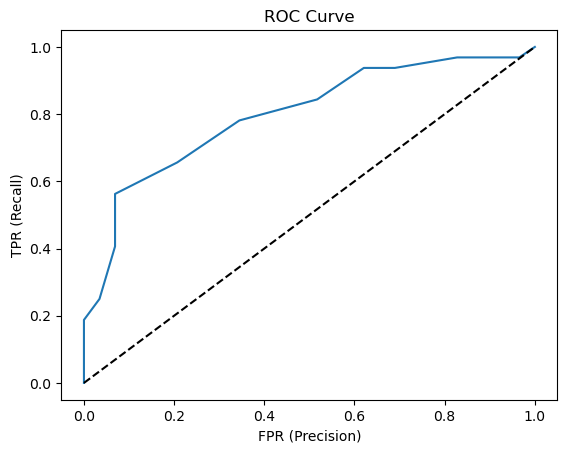

Area under curve:  0.7979525862068966


In [31]:
# 20. Đánh giá mô hình thông qua đồ thị AUC & ROC
from sklearn.metrics import roc_curve, auc

y_score = knn.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('ROC Curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr, tpr)
plt.plot((0, 1), ls='dashed', color='black')
plt.show()
print("Area under curve: ", auc(fpr, tpr))

In [33]:
# 21. Hãy in ra màn hình accuracy, confusion matrix, [tn, fn, fp, tp], [TPR, FPR, TNR, FNR], precision, recall, F1 score
# và đồ thị AUC & ROC với ngưỡng xác xuất phân lớp là 0.65
# Đưa ra kết luận khi thiết lập threshold tăng hoặc giảm sẽ tác động như thế nào đến kết quả đanhh giá mô hình
# confusion matrix với threshold = 0.65
from sklearn.metrics import confusion_matrix
cfmx065 = confusion_matrix(y_test, y_pred_test_new_065)
print(cfmx065)

[[27  2]
 [16 16]]


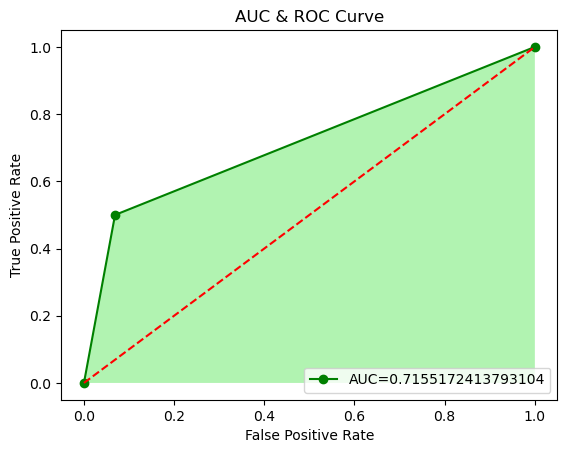

In [34]:
# AUC & ROC với threshold = 0.65
from sklearn import metrics
y_pred_proba = (knn.predict_proba(x_test)[:,1] >= 0.65).astype(float)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'go-', label='AUC='+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC Curve')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [37]:
# Test sample with threshold = 0.65

print('predicting with threshold = 0.65 :')
y_pred_sample_065 = (knn.predict_proba(sample_input)[:, 1] >= 0.65).astype(float)
print(y_pred_sample_065)

predicting with threshold = 0.65 :
[0.]


In [38]:
# 22.Viết chương trình dự đoán bệnh tim dưới dạng Console Application, cho phép người dùng nhập các đặc trưng đầu vào (feature input) 
# và ngưỡng xác suất (threshold, nếu không nhâph thì mặc định là 0.5) sau đó in ra kết quả dự đoán bệnh tim dựa trên mô hình đã xây dựng

# save model to file
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))

In [39]:
import pickle
# Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

# AI Console Application to predict heart disease
# 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
# example input: 49, 1, 1, 120, 250, 0, 1, 180, 0, 0.5, 2, 0, 2

v1 = float(input('age: '))
v2 = float(input('sex: '))
v3 = float(input('cp: '))
v4 = float(input('trestbps: '))
v5 = float(input('chol: '))
v6 = float(input('fbs: '))
v7 = float(input('restecg: '))
v8 = float(input('thalach: '))
v9 = float(input('exang: '))
v10 = float(input('oldpeak: '))
v11 = float(input('slope: '))
v12 = float(input('ca: '))
v13 = float(input('thal: '))

y_pred = loaded_model.predict([[v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13]])
print("Kết quả dự báo: ", str(y_pred[0]))

if y_pred[0] == 1:
    print("Có bệnh tim")
else:
    print("Không có bệnh tim")

Kết quả dự báo:  1.0
Có bệnh tim
